In [1]:
#Based off of: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

In [2]:
!echo %cd%

C:\Users\kmoudgalya\Desktop\Code\ML Insurance


In [3]:
#the "r" after the "(" is the magic elixir that helps avoid UTF problems.
df = pd.read_csv(r"C:\Users\kmoudgalya\Desktop\Code\ML Insurance\PC_Data\Train.csv")
df.head()

,Record_ID,Target1,Target2,Target3,Source System,Product,Underwriting Year,Effective Date,Expiry Date,Transaction Type,...,Tools_Sum_Insured_Ind,Contract_Works_Sum_Insured_Ind,Hired_in_Plan_Sum_Insured_Ind,Own_Plant_Sum_Insured_Ind,Location,Public_Liability_Limit_5000000.2,Public_Liability_Limit_5000000.3,Professional_Indemnity_Limit_g,Risk_Postcode2,TotalEmployees
0,0,0,0.0,0.0,Simple,TradeE,2013,2013-02-15,2014-02-14,New business,...,0,0,0,0,IPSWICH,1,0,0,ip21 5,4
1,1,0,0.0,0.0,Simple,TradeE,2013,2013-03-29,2014-03-28,New business,...,1,0,0,0,NORTHAMPTON,0,0,0,NN6 8,0
2,2,0,0.0,0.0,Simple,TradeE,2013,2013-06-23,2014-06-22,New business,...,0,0,0,0,DURHAM,0,0,1,DH5 9,1
3,3,0,0.0,0.0,Simple,TradeE,2013,2013-10-25,2014-10-24,New business,...,0,0,0,0,EAST LONDON,1,0,0,E6 3,1
4,4,0,0.0,0.0,Simple,TradeE,2013,2013-08-18,2014-08-17,New business,...,0,0,0,0,NORTHAMPTON,1,0,1,nn6 9,1


In [4]:
print(df.isnull().sum())

Record_ID                                0
Target1                                  0
Target2                                  0
Target3                                  0
Source System                            0
Product                                  0
Underwriting Year                        0
Effective Date                           0
Expiry Date                              0
Transaction Type                         0
Public Liability Limit                   0
Employers Liability Limit                0
Tools Sum Insured                        0
Professional Indemnity Limit             0
Contract Works Sum Insured               0
Hired in Plan Sum Insured                0
Own Plant Sum Insured                    0
Trade 1                                  0
Trade 2                              21931
Manual EE                                0
Clerical EE                              0
Subcontractor EE                         0
Match Type                               0
Trade 1 Cat

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167879 entries, 0 to 167878
Data columns (total 64 columns):
Record_ID                           167879 non-null int64
Target1                             167879 non-null int64
Target2                             167879 non-null float64
Target3                             167879 non-null float64
Source System                       167879 non-null object
Product                             167879 non-null object
Underwriting Year                   167879 non-null int64
Effective Date                      167879 non-null object
Expiry Date                         167879 non-null object
Transaction Type                    167879 non-null object
Public Liability Limit              167879 non-null int64
Employers Liability Limit           167879 non-null int64
Tools Sum Insured                   167879 non-null float64
Professional Indemnity Limit        167879 non-null int64
Contract Works Sum Insured          167879 non-null int64
Hired in

count    167879.000000
mean          0.267483
std          22.904989
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        8919.270854
Name: Target3, dtype: float64


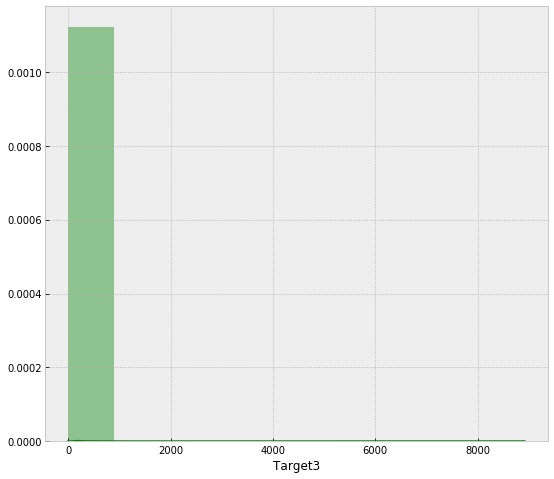

In [6]:
#Describing the target:
print(df["Target3"].describe())
plt.figure(figsize=(9,8))
sns.distplot(df["Target3"], color = 'g', bins = 10, hist_kws={'alpha':0.4});

In [7]:
#df = df.drop(columns=['CancellationEffectiveDate','Target1','Target2'])
df = df.drop(columns=['CancellationEffectiveDate'])
df_use = df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D3E3A5A20>,
      dtype=object)

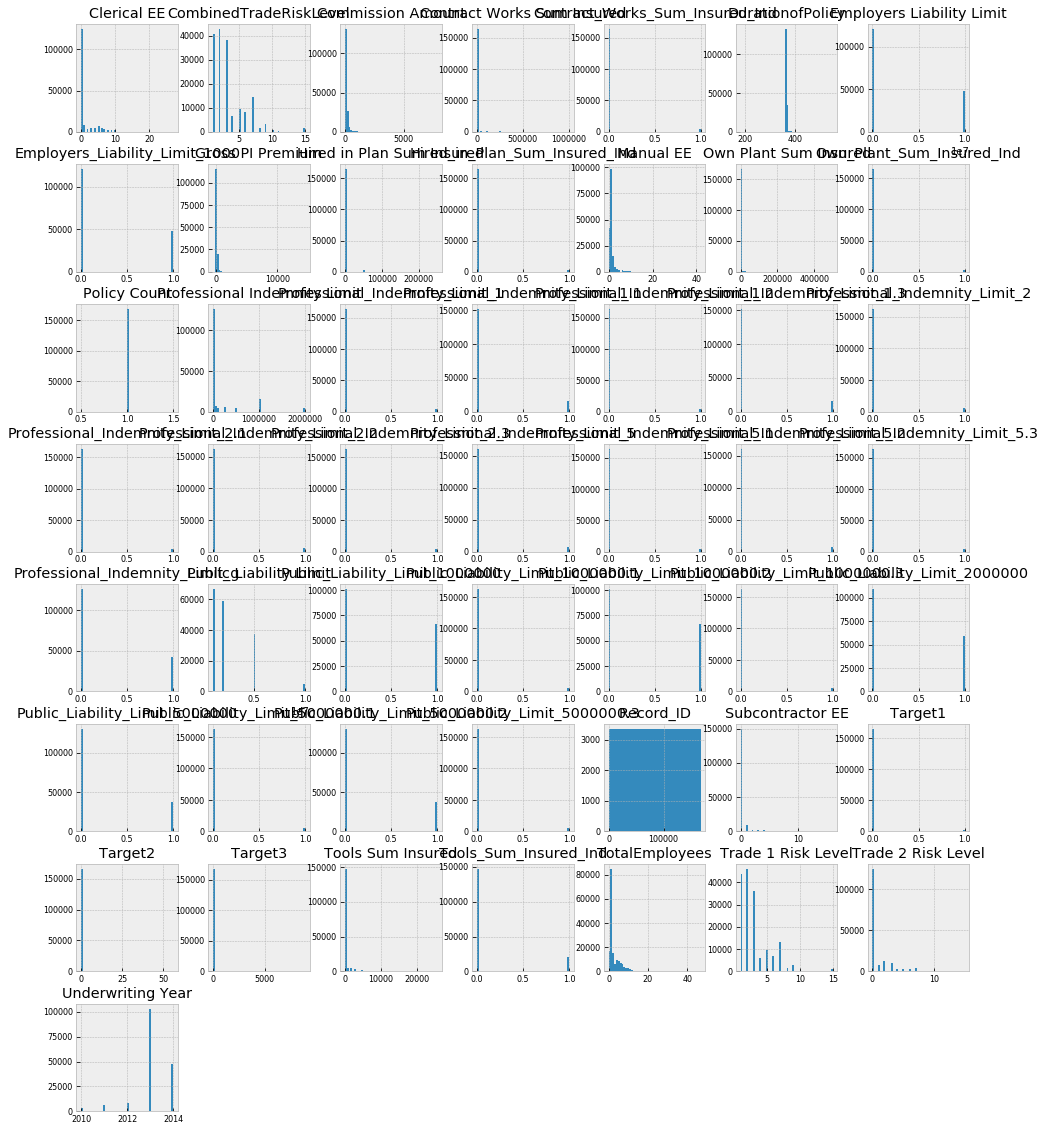

In [8]:
df.hist(figsize=(16,20), bins = 50, xlabelsize = 8, ylabelsize = 8)
#this does not look good

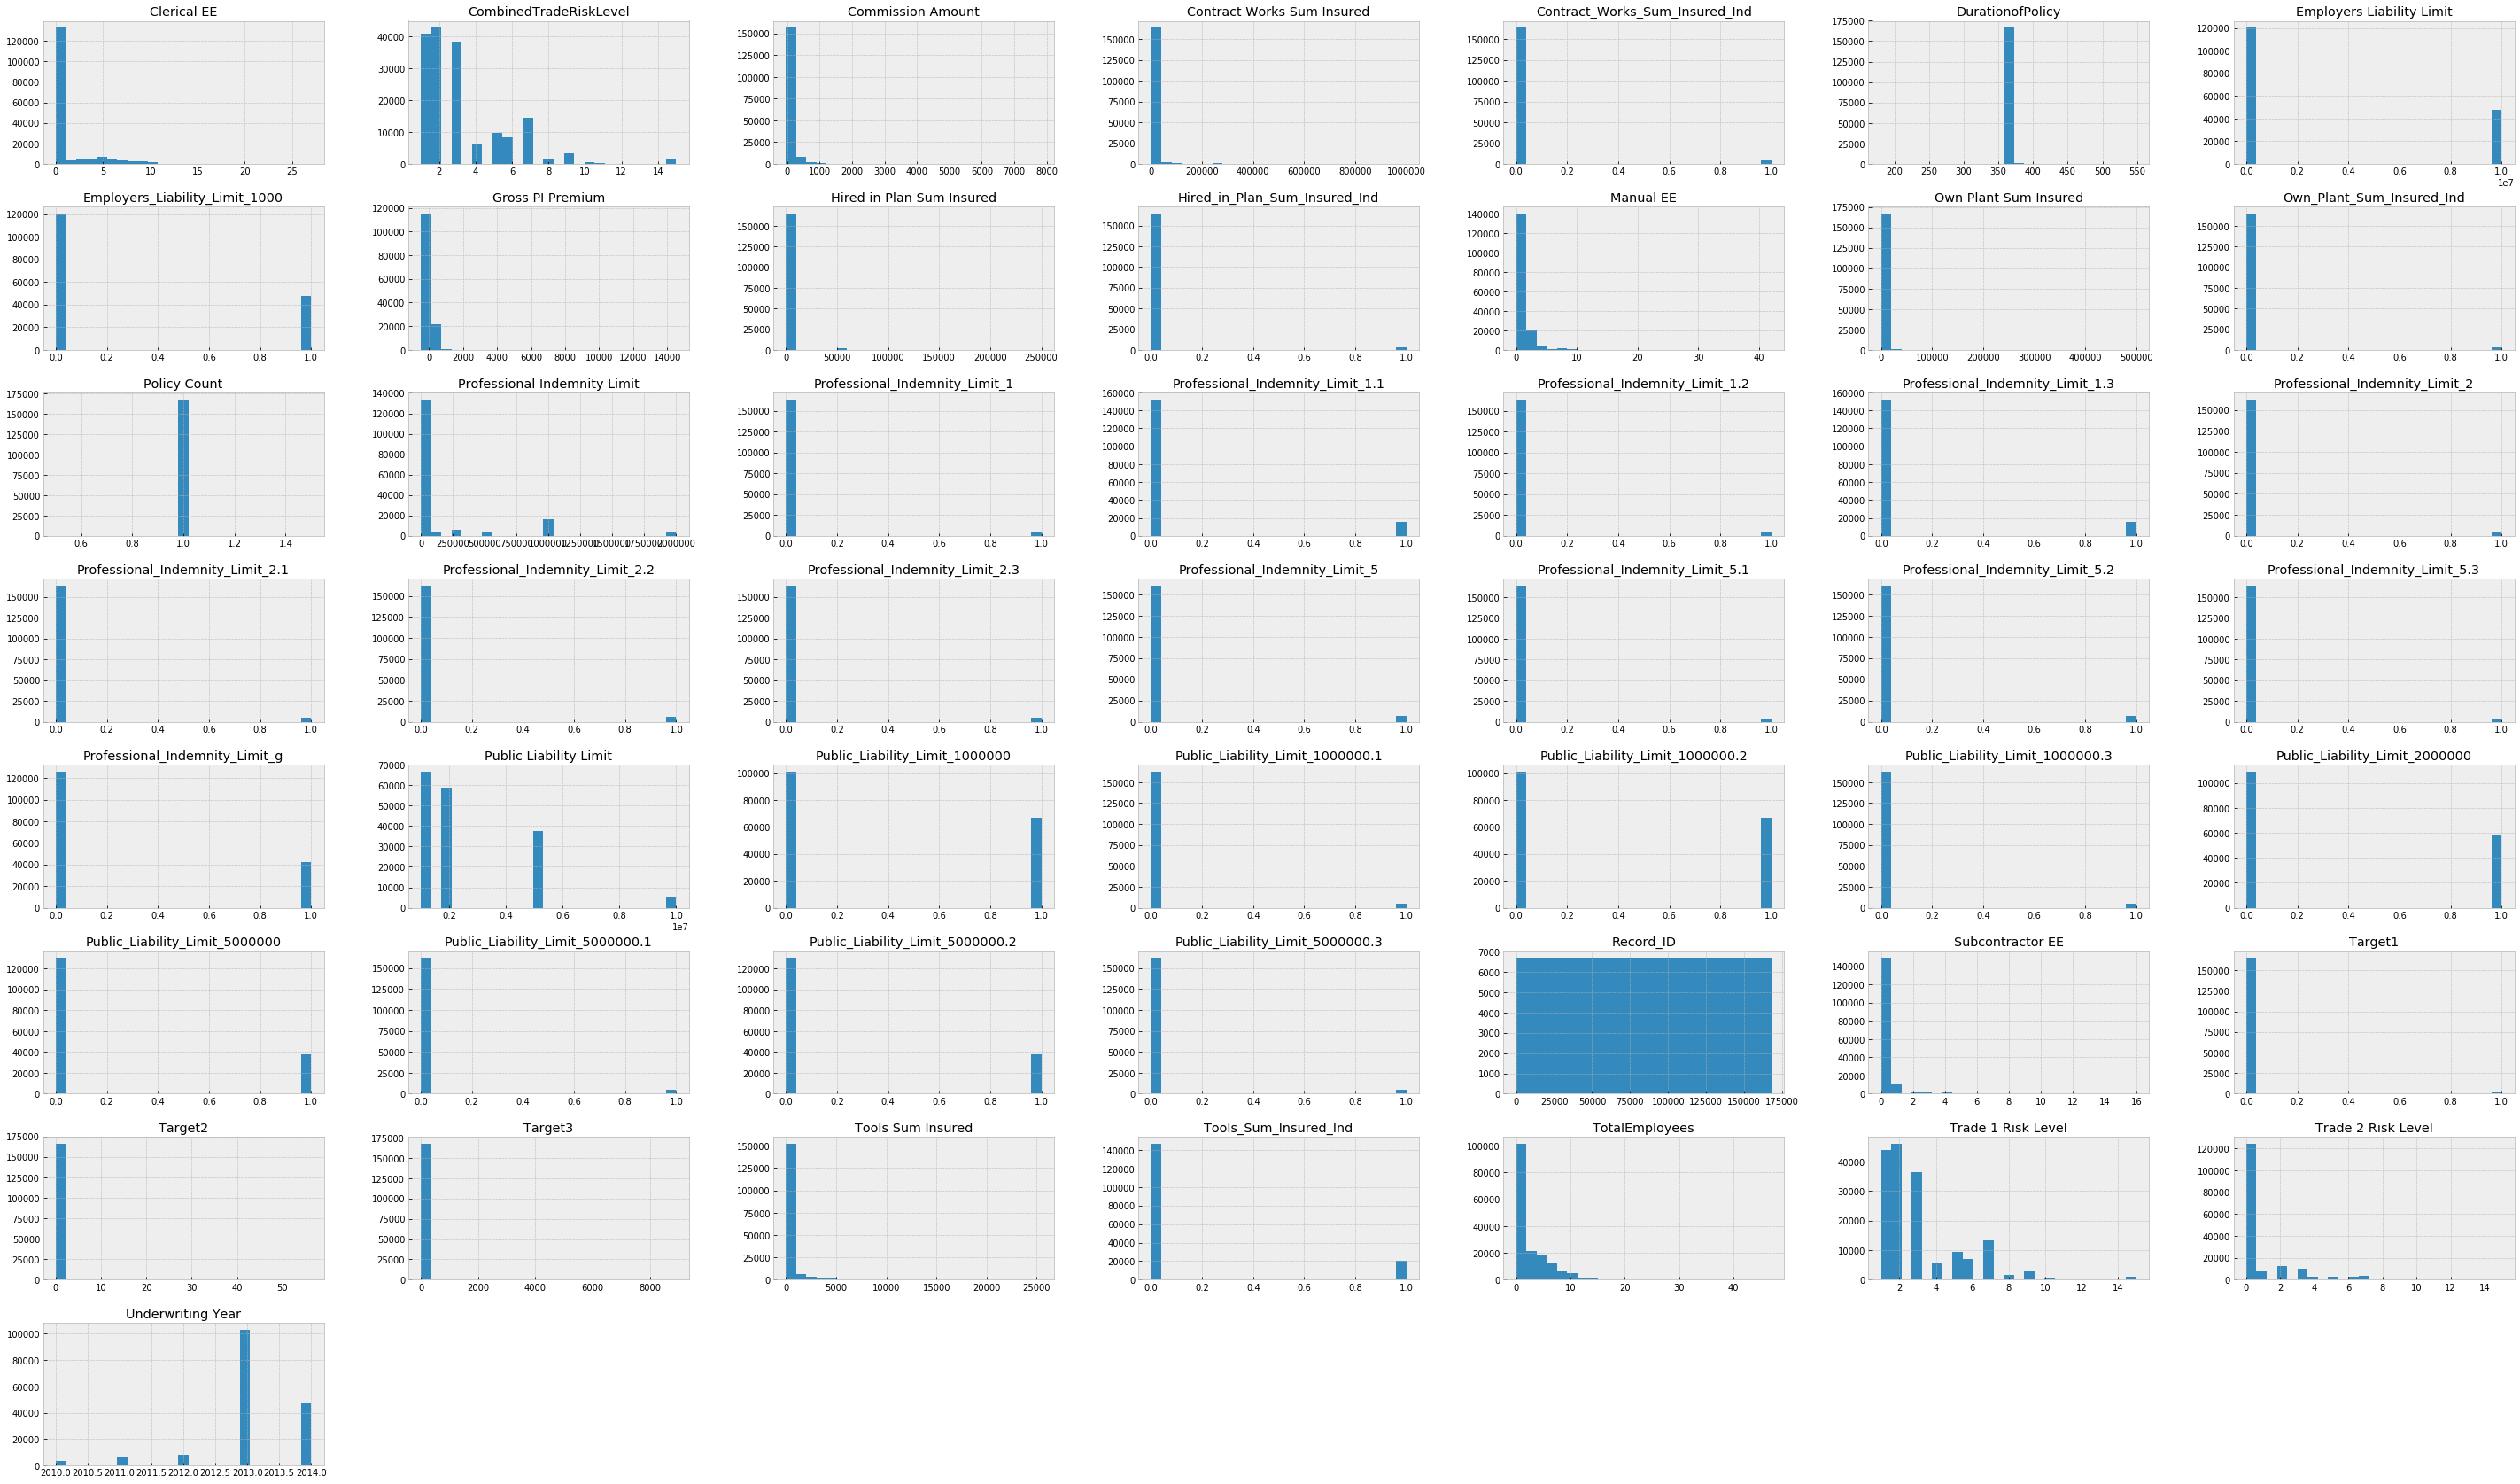

In [10]:
fig = df.hist(figsize=(50,30), bins=25)

In [11]:
#for i in range(0, len(df_num.columns)):
#    sns.distplot(df_num.columns[i])

In [12]:
#retaining only numeric features
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()

,Record_ID,Target1,Target2,Target3,Underwriting Year,Public Liability Limit,Employers Liability Limit,Tools Sum Insured,Professional Indemnity Limit,Contract Works Sum Insured,...,Professional_Indemnity_Limit_2.2,Professional_Indemnity_Limit_2.3,Tools_Sum_Insured_Ind,Contract_Works_Sum_Insured_Ind,Hired_in_Plan_Sum_Insured_Ind,Own_Plant_Sum_Insured_Ind,Public_Liability_Limit_5000000.2,Public_Liability_Limit_5000000.3,Professional_Indemnity_Limit_g,TotalEmployees
0,0,0,0.0,0.0,2013,5000000,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,4
1,1,0,0.0,0.0,2013,2000000,0,2000.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,0.0,0.0,2013,1000000,0,0.0,100000,0,...,0,0,0,0,0,0,0,0,1,1
3,3,0,0.0,0.0,2013,5000000,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4,0,0.0,0.0,2013,5000000,0,0.0,1000000,0,...,0,0,0,0,0,0,1,0,1,1


In [13]:
df_num_corr = df_num.corr()['Target3'][:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.0].sort_values(ascending=False)
print("There are {} correlated values with Target3:\n{}".format(len(golden_features_list), golden_features_list))

There are 49 correlated values with Target3:
Target3                             1.000000
Target1                             0.096969
Target2                             0.078801
Trade 1 Risk Level                  0.010397
CombinedTradeRiskLevel              0.009783
Commission Amount                   0.006940
Record_ID                           0.005066
Public_Liability_Limit_2000000      0.004016
Hired_in_Plan_Sum_Insured_Ind       0.003807
Hired in Plan Sum Insured           0.003712
Tools_Sum_Insured_Ind               0.002846
Employers Liability Limit           0.002750
Employers_Liability_Limit_1000      0.002750
Gross PI Premium                    0.002322
Contract Works Sum Insured          0.002031
Public Liability Limit              0.002013
Own_Plant_Sum_Insured_Ind           0.001958
Manual EE                           0.001930
Tools Sum Insured                   0.001905
Trade 2 Risk Level                  0.001692
Contract_Works_Sum_Insured_Ind      0.001550
Own Plant 

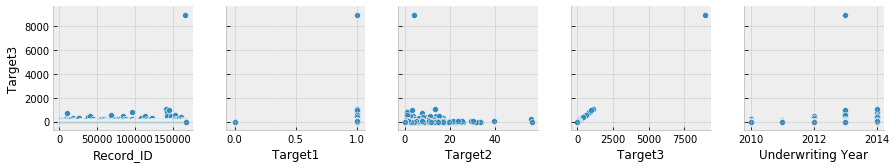

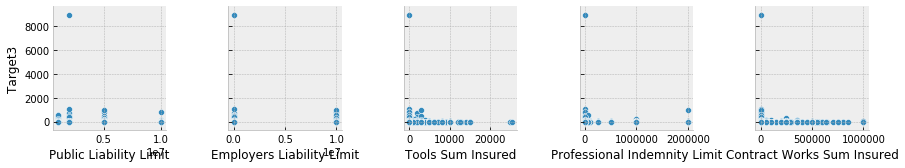

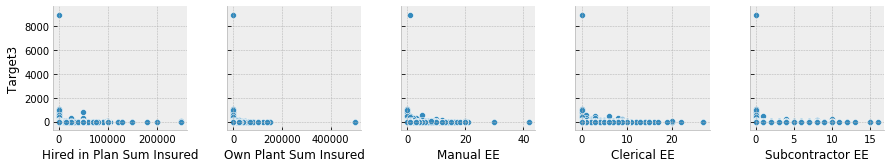

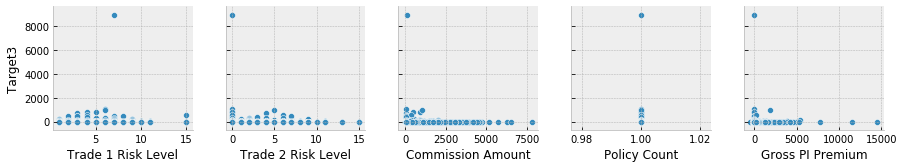

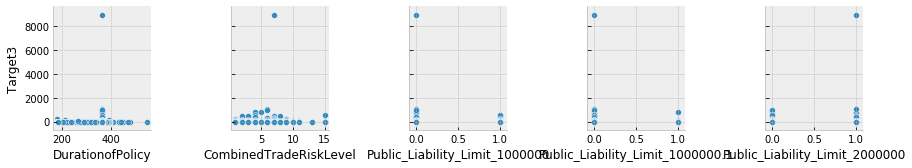

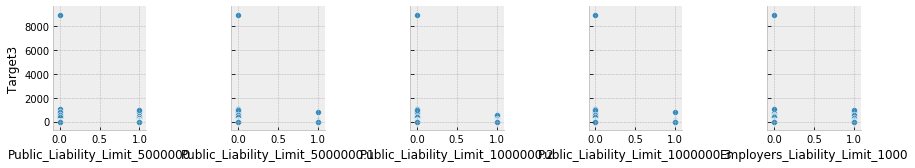

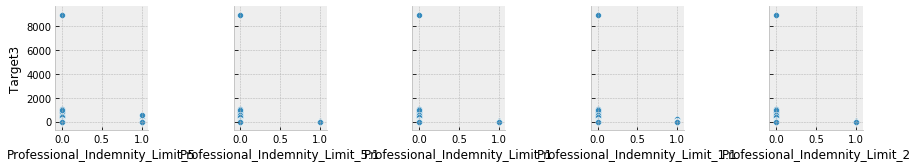

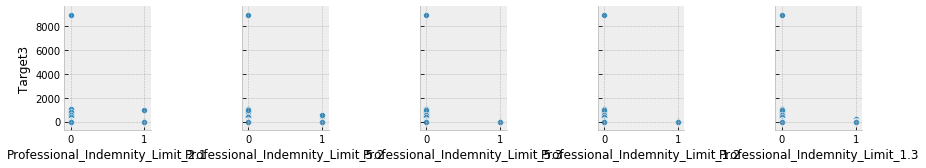

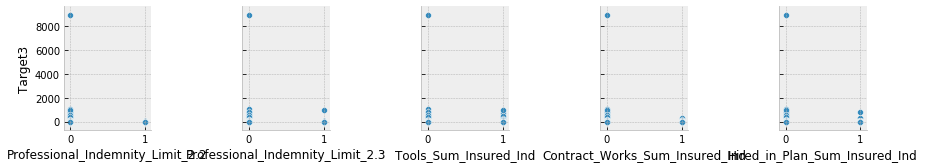

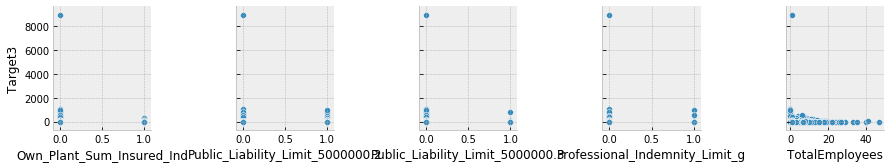

In [14]:
#so we cannot plot categorical stuff against a continuous one, so we hae problems here.
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data = df_num,
                x_vars = df_num.columns[i:i+5],
                y_vars = ['Target3'])

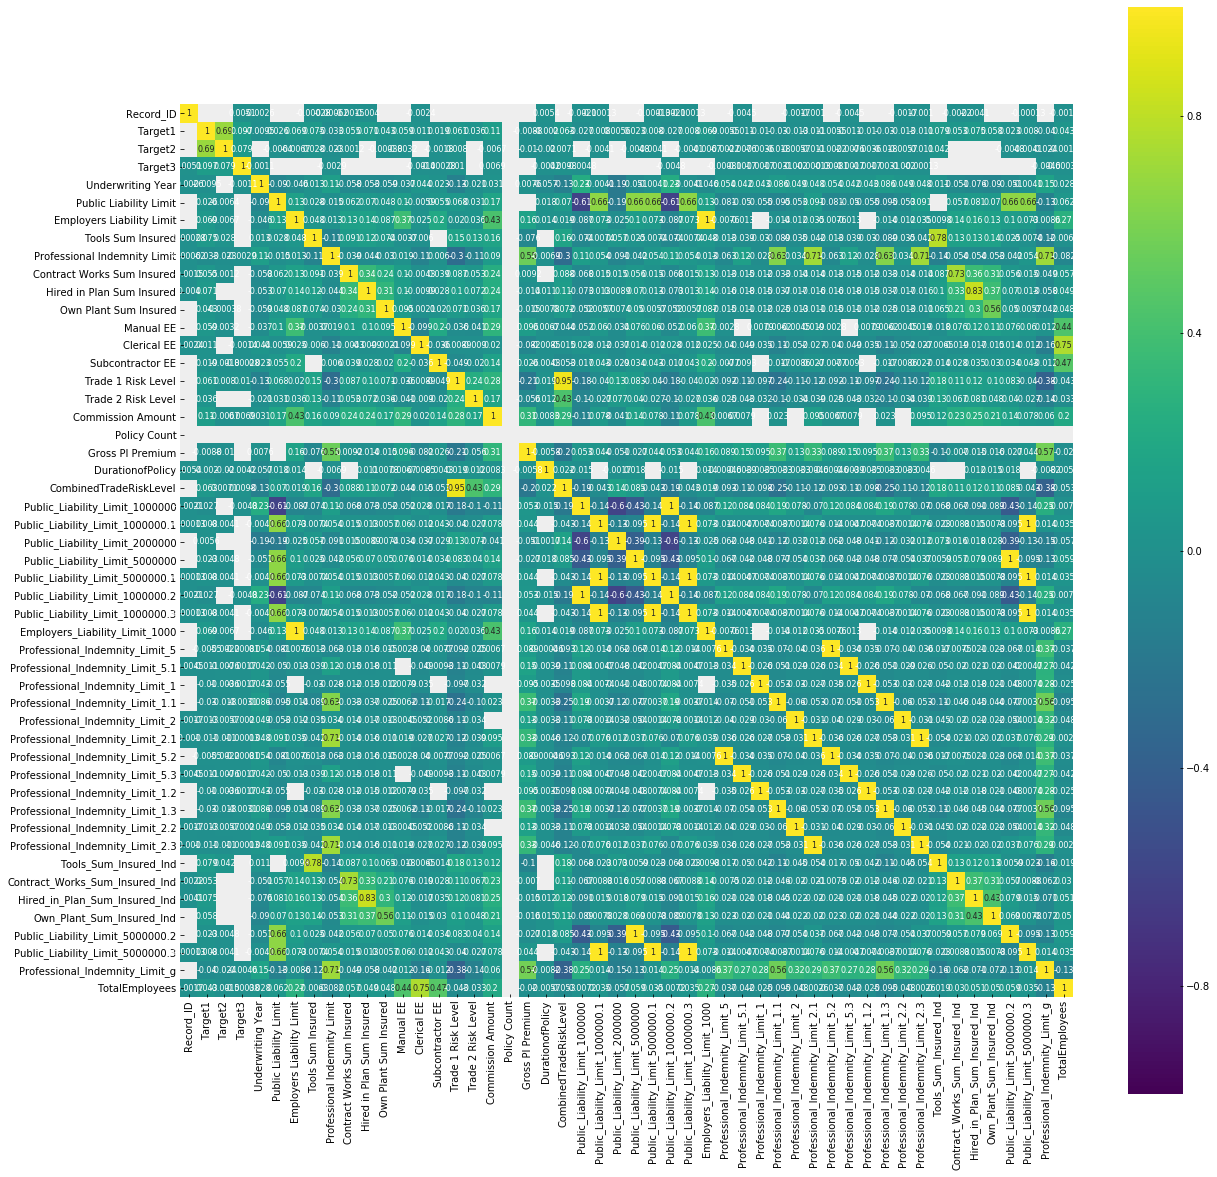

In [15]:
corr = df_num.corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr[(corr >= 0.005) | (corr <= -0.0001)],
            cmap = 'viridis', vmax = 1.0, vmin = -1.0,
            annot = True, annot_kws = {"size": 8}, square = True);